# Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ebbb4a33aa644527a29c121fe811d861 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CATeNJuWTcb5iuplHUzr71UNMP3TOofUtoYLNXei6xUh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ebbb4a33aa644527a29c121fe811d861.get_object(Bucket='sentimentalanalysisofcovid19tweet-donotdelete-pr-ye1lk5o4jj2gzb',Key='Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



data= pd.read_csv(body)
data.head()

,id,full_text,retweet_count,Sentiment
0,1271108113777688577,Birthday Night for the very first time spendin...,0,positive
1,1255349297027190784,Small but significant steps India fights Coron...,0,positive
2,1267511521594281996,I must admit that I am very impressed how sma...,0,positive
3,1271146089626943497,12 NRDF STAFF AND 32 ODISHA FIREMEN TEST COVID...,0,positive
4,1262580089960751105,Last freestyle rap for coronavirus Chenoli LINK,0,neutral


In [3]:

data=data.drop(columns='retweet_count')
data.shape

(60001, 3)

#### checking for all null values

In [4]:
data.isnull().sum()

id           0
full_text    0
Sentiment    2
dtype: int64

#### Dropping null value

In [5]:
data=data.dropna()
data.isnull().sum()

id           0
full_text    0
Sentiment    0
dtype: int64

#### Changing all the tweets into lowercase¶


In [6]:
data['clean_tweet'] = data['full_text'].apply(lambda x: x.lower())
data.head(5)

,id,full_text,Sentiment,clean_tweet
0,1271108113777688577,Birthday Night for the very first time spendin...,positive,birthday night for the very first time spendin...
1,1255349297027190784,Small but significant steps India fights Coron...,positive,small but significant steps india fights coron...
2,1267511521594281996,I must admit that I am very impressed how sma...,positive,i must admit that i am very impressed how sma...
3,1271146089626943497,12 NRDF STAFF AND 32 ODISHA FIREMEN TEST COVID...,positive,12 nrdf staff and 32 odisha firemen test covid...
4,1262580089960751105,Last freestyle rap for coronavirus Chenoli LINK,neutral,last freestyle rap for coronavirus chenoli link


#### Removing words whom length is 1 And Replacing Numbers (integers) with space¶


In [7]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
data.head()

,id,full_text,Sentiment,clean_tweet
0,1271108113777688577,Birthday Night for the very first time spendin...,positive,birthday night for the very first time spendin...
1,1255349297027190784,Small but significant steps India fights Coron...,positive,small but significant steps india fights coron...
2,1267511521594281996,I must admit that I am very impressed how sma...,positive,must admit that am very impressed how smart th...
3,1271146089626943497,12 NRDF STAFF AND 32 ODISHA FIREMEN TEST COVID...,positive,nrdf staff and odisha firemen test covid...
4,1262580089960751105,Last freestyle rap for coronavirus Chenoli LINK,neutral,last freestyle rap for coronavirus chenoli link


In [8]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/dsxuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Creating token for the clean tweets

In [9]:
data['tweet_token'] = data['clean_tweet'].apply(lambda x:nltk.word_tokenize(x))
data.head()

,id,full_text,Sentiment,clean_tweet,tweet_token
0,1271108113777688577,Birthday Night for the very first time spendin...,positive,birthday night for the very first time spendin...,"[birthday, night, for, the, very, first, time,..."
1,1255349297027190784,Small but significant steps India fights Coron...,positive,small but significant steps india fights coron...,"[small, but, significant, steps, india, fights..."
2,1267511521594281996,I must admit that I am very impressed how sma...,positive,must admit that am very impressed how smart th...,"[must, admit, that, am, very, impressed, how, ..."
3,1271146089626943497,12 NRDF STAFF AND 32 ODISHA FIREMEN TEST COVID...,positive,nrdf staff and odisha firemen test covid...,"[nrdf, staff, and, odisha, firemen, test, covi..."
4,1262580089960751105,Last freestyle rap for coronavirus Chenoli LINK,neutral,last freestyle rap for coronavirus chenoli link,"[last, freestyle, rap, for, coronavirus, cheno..."


In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Importing stop words from NLTK corpus for english language

In [11]:
stop_words = set(stopwords.words('english'))
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
data.head()

,id,full_text,Sentiment,clean_tweet,tweet_token,tweet_token_filtered
0,1271108113777688577,Birthday Night for the very first time spendin...,positive,birthday night for the very first time spendin...,"[birthday, night, for, the, very, first, time,...","[birthday, night, first, time, spending, alone..."
1,1255349297027190784,Small but significant steps India fights Coron...,positive,small but significant steps india fights coron...,"[small, but, significant, steps, india, fights...","[small, significant, steps, india, fights, cor..."
2,1267511521594281996,I must admit that I am very impressed how sma...,positive,must admit that am very impressed how smart th...,"[must, admit, that, am, very, impressed, how, ...","[must, admit, impressed, smart, covid, virus, ..."
3,1271146089626943497,12 NRDF STAFF AND 32 ODISHA FIREMEN TEST COVID...,positive,nrdf staff and odisha firemen test covid...,"[nrdf, staff, and, odisha, firemen, test, covi...","[nrdf, staff, odisha, firemen, test, covid, po..."
4,1262580089960751105,Last freestyle rap for coronavirus Chenoli LINK,neutral,last freestyle rap for coronavirus chenoli link,"[last, freestyle, rap, for, coronavirus, cheno...","[last, freestyle, rap, coronavirus, chenoli, l..."


In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Lemmatization - Lemmatization is the process of converting a word to its base form.¶


In [13]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

0    birthday night first time spending alone time ...
1    small significant step india fight corona cher...
2    must admit impressed smart covid virus really ...
3    nrdf staff odisha fireman test covid positive ...
4          last freestyle rap coronavirus chenoli link
5    link young family going put lot pressure exper...
6    ek arsey se rubaru na ho paye hum tum pahad au...
7    student worried due corona crisis krayadravyak...
8    lakh crore economic package atmanirbharbharat ...
9    sandeep kal jaipur jail become new corona hots...
Name: tweet_lemmatized, dtype: object

In [14]:
!pip install wordcloud

#### Will see the most commonly used words in the column i.e. " "tweet_lematized"

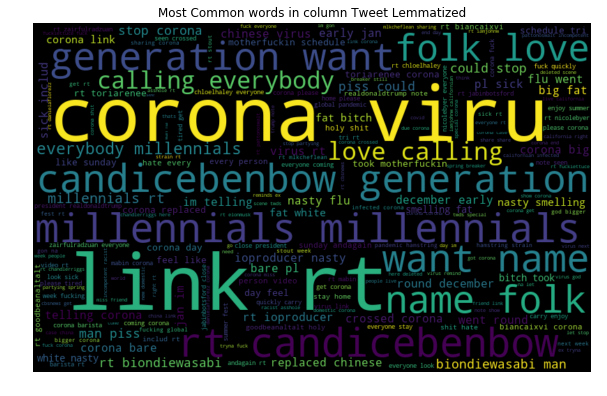

In [15]:
#visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in data['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

####  Most common words in Positive tweets

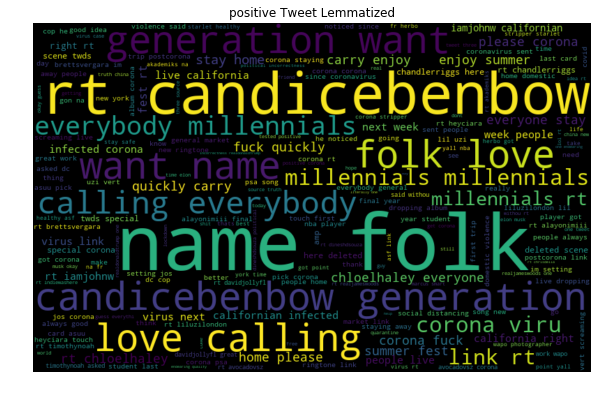

In [16]:
positive_words =' '.join([text for text in data['tweet_lemmatized'][data['Sentiment'] == "positive"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("positive Tweet Lemmatized")
plt.show()

####  Most common words in neutral tweets

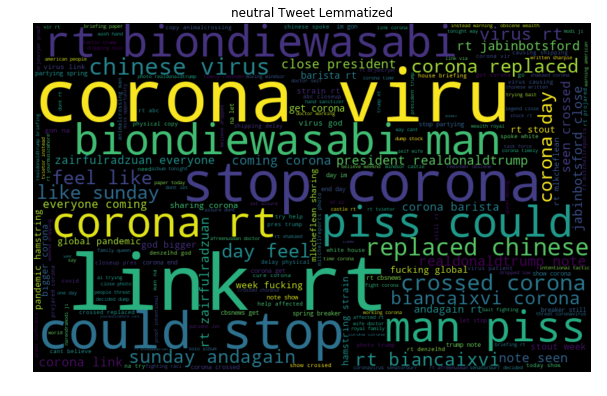

In [17]:
neutral_words =' '.join([text for text in data['tweet_lemmatized'][data['Sentiment'] == "neutral"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("neutral Tweet Lemmatized")
plt.show()

####  Most common words in negative tweets

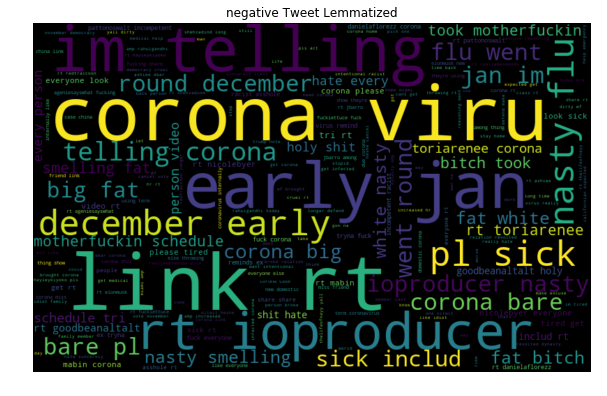

In [18]:
negative_words =' '.join([text for text in data['tweet_lemmatized'][data['Sentiment'] == "negative"]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("negative Tweet Lemmatized")
plt.show()

#### Bag-of-Words Features

In [19]:
## Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Bag-Of-Words feature matrix - For columns "combine_df['tweet_lemmatized']"
bow_lemm = bow_vectorizer.fit_transform(data['tweet_lemmatized']).toarray()
bow_lemm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### mapping the Sentiment column (Dependent column) with 1, 0 and -1

In [20]:
x=bow_lemm
y=data['Sentiment']
y.replace(['neutral','positive','negative'],[0,1,-1],inplace=True)
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64

#### Splitting data into train and test

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#### Scaling the training and testing data

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Using Decision Tree Classifier for training and testing

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("test Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9917998177737283
test Accuracy : 0.8898


In [24]:
y_pred=pd.Series(y_pred)
y_pred.replace([0,1,-1],['neutral','positive','negative'],inplace=True)
y_pred.head()

0     neutral
1     neutral
2     neutral
3    positive
4    negative
dtype: object

### Scrapping twitter data with the help of Tweepy Library and saving it in a csv file

In [25]:
!pip install tweepy

In [59]:
import tweepy
import pandas as pd

consumer_key = "rm2bLDjA2BzljoA0GomL5o6W7"
consumer_secret = "xiFBG4VKWPuQts1v3uqAesllpDp36y44YkFnzBtezSbSYW9dBV"
access_token = "935519854064418816-sOBxmFMaDygAx3FQXRBjH0drpZ2OXpB"
access_token_secret = "GbOTefzapdet9vpmR3H9OBRuJNJNs1cI4Adh5HrkIYPJz"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)
number_of_items=500

searchword="#COVID and #DELHI "
tweets=tweepy.Cursor(api.search,q=searchword,lang='en').items(number_of_items)
names_text=[[tweet.user.screen_name,tweet.text.lower(),tweet.created_at,tweet.user.location.lower()]for tweet in tweets]
df=pd.DataFrame(data=names_text,columns=['Name','Text',"Date","Location"])


searchword="#COVID and #Chennai"
tweets=tweepy.Cursor(api.search,q=searchword,lang='en').items(number_of_items)
names_text=[[tweet.user.screen_name,tweet.text.lower(),tweet.created_at,tweet.user.location.lower()]for tweet in tweets]
df1=pd.DataFrame(data=names_text,columns=['Name','Text',"Date","Location"])

searchword="#COVID and #Mumbai"
tweets=tweepy.Cursor(api.search,q=searchword,lang='en').items(number_of_items)
names_text=[[tweet.user.screen_name,tweet.text.lower(),tweet.created_at,tweet.user.location.lower()]for tweet in tweets]
df2=pd.DataFrame(data=names_text,columns=['Name','Text',"Date","Location"])

searchword="#COVID and #Bengaluru"
tweets=tweepy.Cursor(api.search,q=searchword,lang='en').items(number_of_items)
names_text=[[tweet.user.screen_name,tweet.text.lower(),tweet.created_at,tweet.user.location.lower()]for tweet in tweets]
df3=pd.DataFrame(data=names_text,columns=['Name','Text',"Date","Location"])

searchword="#COVID and #Kolkata"
tweets=tweepy.Cursor(api.search,q=searchword,lang='en').items(number_of_items)
names_text=[[tweet.user.screen_name,tweet.text.lower(),tweet.created_at,tweet.user.location.lower()]for tweet in tweets]
df4=pd.DataFrame(data=names_text,columns=['Name','Text',"Date","Location"])

frames=[df,df1,df2,df3,df4]
result = pd.concat(frames)
print(result)


for i in range(len(result)) :
    if "delhi" in result.iloc[i, 3] or "delhi" in result.iloc[i, 1]:
        result.iloc[i, 3]="Delhi"
    elif "mumbai" in result.iloc[i, 3] or "mumbai" in result.iloc[i, 1]:
        result.iloc[i, 3]="Mumbai"
    elif "chennai" in result.iloc[i, 3] or "chennai" in result.iloc[i, 1]:
        result.iloc[i, 3]="Chennai"
    elif "bengaluru" in result.iloc[i, 3] or "bengaluru" in result.iloc[i, 1]:
        result.iloc[i, 3]="Bengaluru"
    elif "kolkata" in result.iloc[i, 3] or "kolkata" in result.iloc[i, 1]:
        result.iloc[i, 3] = "Kolkata"
    else:
        result.iloc[i, 3] = "Other"

result.to_csv('tweets.csv', index=True)
df=result

                Name                                               Text  \
0     SweetCookiesme  rt @yogendrapal72: 8,80,603 and counting... co...   
1            bhurtya  rt @yogendrapal72: 8,80,603 and counting... co...   
2      yogendrapal72  8,80,603 and counting... corona virus india up...   
3            isgshah  @vishaldadlani @aamaadmiparty amidst all, only...   
4    AngsumansServer  total confirmed #covid-19 cases in #delhi, #in...   
5      rasheedkidwai  rt @orfonline: .@oommen: with ramped-up testin...   
6     AnveshPandey15  #delhi #covid19 recovery rate is better than o...   
7    AngsumansServer  total confirmed #covid-19 cases in #delhi, #in...   
8          HinduNatl  rt @thedailypioneer: #covid19: prime minister ...   
9    TheDailyPioneer  #covid19: prime minister @narendramodi on satu...   
10            oommen  rt @orfonline: .@oommen: with ramped-up testin...   
11    JatinJayKaran3  rt @ridhimb: new zealnder youtuber  @iamkarlro...   
12         orfonline  .@o

###  Viewing the scapped tweets csv file

In [60]:
df["Location"].value_counts()

Other        445
Chennai      380
Bengaluru    245
Delhi        243
Mumbai       109
Kolkata        6
Name: Location, dtype: int64

In [61]:
df.head()

,Name,Text,Date,Location
0,SweetCookiesme,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 01:09:37,Other
1,bhurtya,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 00:53:43,Other
2,yogendrapal72,"8,80,603 and counting... corona virus india up...",2020-07-13 00:53:15,Other
3,isgshah,"@vishaldadlani @aamaadmiparty amidst all, only...",2020-07-12 15:50:34,Delhi
4,AngsumansServer,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-12 08:48:38,Delhi


In [62]:
df.shape

(1428, 4)

### Converting HTML entities and saving clean tweets to new clean tweet column

In [63]:
import html
from html.parser import HTMLParser
html_parser = HTMLParser()
df['clean_tweet'] = df['Text'].apply(lambda x: html.unescape(x))

### Removing twitter handles from all tweets in clean tweet column

In [64]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df['clean_tweet'] = np.vectorize(remove_pattern)(df['clean_tweet'], "@[\w]*")

### converting tweets to lowercase

In [65]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())

### Apostrophe lookup in tweets

In [66]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

### Short words lookup

In [67]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))

### Emoticon Lookup

In [ ]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))

### Replacing punctuations with spaces

In [69]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

### Replacing special characters with spaces

In [70]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

### Replacing numbers with spaces

In [71]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

### Removing words with length 1

In [72]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

### Tokenizing the clean_tweet column and removing stop words from new tweet_token column

In [73]:
from nltk import word_tokenize 

In [74]:
df['tweet_token'] = df['clean_tweet'].apply(lambda x: word_tokenize(x))
df['tweet_token_filtered'] = df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

### Lemmatization - Lemmatization is the process of converting a word to its base form.

In [75]:
df['tweet_lemmatized'] = df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df.head()

,Name,Text,Date,Location,clean_tweet,tweet_token,tweet_token_filtered,tweet_lemmatized
0,SweetCookiesme,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 01:09:37,Other,rt and counting corona virus india updates cor...,"[rt, and, counting, corona, virus, india, upda...","[rt, counting, corona, virus, india, updates, ...",rt counting corona virus india update coronavi...
1,bhurtya,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 00:53:43,Other,rt and counting corona virus india updates cor...,"[rt, and, counting, corona, virus, india, upda...","[rt, counting, corona, virus, india, updates, ...",rt counting corona virus india update coronavi...
2,yogendrapal72,"8,80,603 and counting... corona virus india up...",2020-07-13 00:53:15,Other,and counting corona virus india updates corona...,"[and, counting, corona, virus, india, updates,...","[counting, corona, virus, india, updates, coro...",counting corona virus india update coronavirus...
3,isgshah,"@vishaldadlani @aamaadmiparty amidst all, only...",2020-07-12 15:50:34,Delhi,amidst all only delhi and kerala have displaye...,"[amidst, all, only, delhi, and, kerala, have, ...","[amidst, delhi, kerala, displayed, intent, fig...",amidst delhi kerala displayed intent fight cov...
4,AngsumansServer,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-12 08:48:38,Delhi,total confirmed covid cases in delhi india is ...,"[total, confirmed, covid, cases, in, delhi, in...","[total, confirmed, covid, cases, delhi, india,...",total confirmed covid case delhi india active ...


### Extracting features from lemmatied tweets with the help of Bag of words Feature

In [76]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_main= bow_vectorizer.fit_transform(data['tweet_lemmatized']).toarray()
bow_main

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Prediction of sentiments with the help of our trained model

In [77]:
bow_main = sc.fit_transform(bow_main)
main_pred=model.predict(bow_main)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
main_pred=pd.Series(main_pred)
main_pred.replace([0,1,-1],['neutral','positive','negative'],inplace=True)
main_pred.head()

0    positive
1    positive
2    positive
3    positive
4     neutral
dtype: object

In [85]:
final=pd.concat([df["Text"],df["Date"],df["Location"]],axis=1)
final["Sentiment"]=main_pred
final.head(15)



,Text,Date,Location,Sentiment
0,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 01:09:37,Other,positive
1,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13 00:53:43,Other,positive
2,"8,80,603 and counting... corona virus india up...",2020-07-13 00:53:15,Other,positive
3,"@vishaldadlani @aamaadmiparty amidst all, only...",2020-07-12 15:50:34,Delhi,positive
4,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-12 08:48:38,Delhi,neutral
5,rt @orfonline: .@oommen: with ramped-up testin...,2020-07-12 02:20:55,Delhi,positive
6,#delhi #covid19 recovery rate is better than o...,2020-07-11 17:54:11,Delhi,negative
7,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-11 14:43:54,Delhi,positive
8,rt @thedailypioneer: #covid19: prime minister ...,2020-07-11 14:15:55,Other,positive
9,#covid19: prime minister @narendramodi on satu...,2020-07-11 14:14:07,Other,positive


In [93]:
final['Date'] = final['Date'].dt.date

In [95]:
final.drop_duplicates(subset='Text', keep='first', inplace=False)

,Text,Date,Location,Sentiment
0,"rt @yogendrapal72: 8,80,603 and counting... co...",2020-07-13,Other,positive
2,"8,80,603 and counting... corona virus india up...",2020-07-13,Other,positive
3,"@vishaldadlani @aamaadmiparty amidst all, only...",2020-07-12,Delhi,positive
4,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-12,Delhi,neutral
5,rt @orfonline: .@oommen: with ramped-up testin...,2020-07-12,Delhi,positive
6,#delhi #covid19 recovery rate is better than o...,2020-07-11,Delhi,negative
7,"total confirmed #covid-19 cases in #delhi, #in...",2020-07-11,Delhi,positive
8,rt @thedailypioneer: #covid19: prime minister ...,2020-07-11,Other,positive
9,#covid19: prime minister @narendramodi on satu...,2020-07-11,Other,positive
11,rt @ridhimb: new zealnder youtuber @iamkarlro...,2020-07-11,Delhi,positive


In [97]:
final.drop(['Text'], axis=1)

,Date,Location,Sentiment
0,2020-07-13,Other,positive
1,2020-07-13,Other,positive
2,2020-07-13,Other,positive
3,2020-07-12,Delhi,positive
4,2020-07-12,Delhi,neutral
5,2020-07-12,Delhi,positive
6,2020-07-11,Delhi,negative
7,2020-07-11,Delhi,positive
8,2020-07-11,Other,positive
9,2020-07-11,Other,positive


In [53]:

from project_lib import Project
project = Project(sc,"b1b16b09-e8e8-4dad-9443-7329983c8856","p-bb1cb98712cd7b785cb10f7bad5b2fda9de95b90")
project.save_data(file_name = "final.csv",data = final.to_csv(index=False))

2020-07-13 06:08:58,685 - __PROJECT_LIB__ - ERROR - failed to initialize ibmos2spark integration
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/project_lib/storage/bcos.py", line 138, in _initialize_bcos2spark
    import ibmos2spark
ModuleNotFoundError: No module named 'ibmos2spark'


{'file_name': 'final.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'sentimentalanalysisofcovid19tweet-donotdelete-pr-ye1lk5o4jj2gzb',
 'asset_id': '00750757-9dde-40bc-a407-728737bafd75'}

In [54]:
final

,Date,Location,Sentiment
0,2020-07-13,Other,positive
1,2020-07-13,Other,positive
2,2020-07-13,Other,positive
3,2020-07-12,Delhi,positive
4,2020-07-12,Delhi,neutral
5,2020-07-12,Delhi,positive
6,2020-07-11,Delhi,negative
7,2020-07-11,Delhi,positive
8,2020-07-11,Other,positive
9,2020-07-11,Other,positive
